<a href="https://colab.research.google.com/github/gboada23/Interpolacion-e-integracion-numerica/blob/main/Metodos_numericos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import math

## **1. Explıque por que en el metodo de biseccion se usa la formula $a+\frac{b-a}{2}$ para el calculo del punto medio y no $\frac{a + b}{2}$. Apoye su conclusion con un ejemplo.**

Ambas se pueden usar para calcular el punto medio en el método de bisección. La razón por la que a veces se prefiere usar  $a+\frac{b-a}{2}$ en ciertos contextos computacionales es para evitar posibles desbordamientos aritméticos.

Por ejemplo Imaginemos que estamos trabajando con números muy grandes en una máquina con una precisión finita.

Supongamos que $ a = 1 $ y  b   es el valor máximo representable en el sistema numérico (por ejemplo, el valor máximo de un entero de 32 bits).

Usando la fórmula  $c = \frac{a + b}{2}$:

 c = $\frac{1 + \text{MAX_VAL}}{2} $

Podríamos experimentar un desbordamiento al sumar 1 con el valor máximo, ya que superaría la representación máxima permitida.

Por otro lado, usando la fórmula $ c = a + \frac{b - a}{2} $:

 c = 1 + $\frac{\text{MAX_VAL} - 1}{2}$

Aquí, estamos evitando la suma directa de  a  y  b , y por lo tanto, prevenimos el potencial desbordamiento.

Por supuesto, en la mayoría de las situaciones prácticas y con los sistemas numéricos modernos, la fórmula \$ c = \frac{a + b}{2} \$ funcionará perfectamente. Sin embargo, en contextos donde el desbordamiento aritmético es una preocupación, la fórmula alternativa puede ser preferible.

#### Un ejemplo seria el siguiente


In [2]:
a = 14**50
b = 21**50
# a+b/2
display((a + b )// 2)
# a+ (b-a)/2
display(a + (b-a)//2)

645557218537805325181446805382696766164436256689144978619957864188

645557218537805325181446805382696766164436256689144978619957864188

### **Conclusiones**
El resultado es igual pero en otros sistemas el primer metodo causaria un debordamiento Pero en Python, debido a su gestión de memoria para enteros, esto no causará un desbordamiento per se. Sin embargo, estos cálculos pueden consumir una gran cantidad de memoria y afectar el rendimiento, especialmente si continúas realizando operaciones aritméticas con estos números extremadamente grandes.

## **2. ¿Cuales criterios de parada puede usarse en el metodo de biseccion ?**

El método de bisección es un método iterativo para encontrar las raíces de una función. Dado que es iterativo, es necesario definir criterios de parada para saber cuándo detener el proceso y considerar que se ha encontrado una solución lo suficientemente buena. Aquí hay varios criterios de parada que pueden ser utilizados en el método de bisección:

1. **Número Máximo de Iteraciones**: Se puede definir un número máximo de iteraciones para evitar que el método se ejecute indefinidamente en caso de que no converja.

2. **Tolerancia de la Raíz**: Detener el método cuando el intervalo $[a, b]$ sea lo suficientemente pequeño. Es decir, cuando $|b - a| < \epsilon$, donde $\epsilon$ es una tolerancia pequeña predefinida.

3. **Tolerancia de la Función**: Detener el proceso cuando el valor de la función en el punto medio sea lo suficientemente cercano a cero, es decir, $|f(c)| < \delta$, donde $c$ es el punto medio del intervalo y $\delta$ es otra pequeña tolerancia predefinida.

4. **Criterio Combinado**: A veces, se utiliza una combinación de los criterios anteriores para garantizar tanto la precisión como la eficiencia.

Estos criterios ayudan a garantizar que el método de bisección no solo encuentre una solución, sino que la solución sea lo suficientemente precisa según lo determinado por las necesidades del problema en cuestión. La elección del criterio de parada adecuado depende en gran medida del problema específico y de las necesidades de precisión.


## **3. Programe el metodo de biseccion y escoja un problema en el que pueda usar dicho metodo. Calcule el el numero de iteraciones necesarias para la convergencia y compare con los resultados obtenidos con su codigo.**

In [3]:
def biseccion(f, a, b, tol=1e-5, max_iter=1000):
    if f(a) * f(b) > 0:
        raise ValueError("f(a) y f(b) deben tener signos opuestos.")
    iteraciones = 0
    while (b - a) / 2 > tol and iteraciones < max_iter:
        c = a + ((b-a)/ 2)
        if f(c) == 0:
            break  # encontramos exactamente la raíz
        elif f(c) * f(a) < 0:
            b = c
        else:
            a = c
        iteraciones += 1
    return a + ((b-a)/ 2), iteraciones

**Problema donde se puede usar dicho metodo de la funcion**
$$f(x)=x^3-4x^2-7x+10$$

In [4]:
def f(x):
    return x**3 - 4*x**2 - 7*x + 10

### Metodo para allar el numero de iteraciones estimadas que deberian cumplirse para hallar la raiz
### $n≥ \frac{log(b−a)−log(tolerancia)}{log(2)}$
​
 Ahora lo aplicamos en codigo

In [5]:
def estimar_iteraciones(a, b, tolerancia):
    return (math.log(b - a) - math.log(tolerancia)) / math.log(2)
# Tomemos un intervalo [a, b] = [1, 4] donde sabemos que hay una raíz.
a, b = 1, 4
raiz, num_iter = biseccion(f, a, b)
tolerancia = 10**-5
n = estimar_iteraciones(a, b, tolerancia)
print(f"La raíz obtenida por el metodo de biseccion es: {round(raiz,2)}")
print(f"Numero de iteraciones estimadas es de {round(n,2)}")
print(f"Número de iteraciones realizadas para la funcion con el metodo de biseccion es  {num_iter}")

La raíz obtenida por el metodo de biseccion es: 4.0
Numero de iteraciones estimadas es de 18.19
Número de iteraciones realizadas para la funcion con el metodo de biseccion es  18



## **Conclusion**

Podemos asegurar que usando el metodo de biseccion para la funcion $$f(x)=x^3-4x^2-7x+10$$ logramos obtener la raiz $X=4$ en 18 iteraciones con nuestro codigo.

Por esa razon al usar la formula para obtener el numero de iteraciones necesarias $n≥ \frac{log(b−a)−log(tolerancia)}{log(2)} = 18.19$ entonces concluimos que el metodo y las iteraciones son eficientes y concuerda con las iteracione estimadas.

## **4. Escoja una funcion y escribala miınimo en cuatro formas de punto fijo. Usa el algoritmo 2.2 para obtener un punto fijo de la funcion. ¿De las cuatro formas cual fue la mejor? Apoye su conclusion en los teoremas del capıtulo.**

## Funciones g(x) escogida $$ x^3 - 6x^2 + 11x - 6 = 0$$

Reescribimos esta ecuación en la forma x = g(x) en cuatro maneras diferentes segun lo pide el ejercicio:

1. **Despejando $x^3$:**  
   $$ x^3 = 6x^2 - 11x + 6 $$
   $$ x = \sqrt[3]{6x^2 - 11x + 6} $$
   Así que, $ g_1(x) = \sqrt[3]{6x^2 - 11x + 6} $.

2. **Despejando $x^2$:**  
   $$ x^2 = \frac{x^3 + 11x - 6}{6}  $$
   $$ x = \sqrt{\frac{x^3 + 11x - 6}{6}}  $$
   Así que, $ g_2(x) = \sqrt{\frac{x^3 + 11x - 6}{6}} $.

3. **Despejando x:**  
   $$ x = \frac{x^3 - 6x^2 + 6}{11} $$
   Así que, $ g_3(x) = \frac{x^3 - 6x^2 + 6}{11} $.

4. **Método de Newton para la ecuación original**:  
 La derivada de $x^3 - 6x^2 + 11x - 6$ es $$3x^2 - 12x + 11$$

 Este es un método iterativo para encontrar raíces de ecuaciones
   entonces: $$ x = x - \frac{x^3 - 6x^2 + 11x - 6}{3x^2 - 12x + 11} $$
   Así que, $ g_4(x)$ = $x - \frac{x^3 - 6x^2 + 11x - 6}{3x^2 - 12x + 11} $.




## Raices reales de la funcion original
$x_1 = 3 $

$x_2 = 2  $

$x_3 = 1$

In [6]:
def g1(x):
    return (6*x**2 - 11*x + 6)**(1/3)
def g2(x):
    return ((x**3 + 11*x - 6) / 6)**(1/2)
def g3(x):
    return (x**3 - 6*x**2 + 6) / 11
def g4(x):
    return x - (x**3 - 6*x**2 + 11*x - 6) / (3*x**2 - 12*x + 11)
def punto_fijo(g, p0, iteraciones, tol=1e-6):
    x = p0
    results = [p0]
    for i in range(iteraciones):
      try:
        p = g(x)
        results.append(p)

        if abs(p - x) < tol:
          break
      except OverflowError:
        print(f"Desbordamiento detectado en la función g en la iteración {i+1}.")
        results.append(np.nan)  # Añade NaN para el valor que causó desbordamiento si lo hubo
        break  # Termina las iteraciones
      x = p
    return results
p0 = 1.5
iteraciones = 30
resultados_g1 = punto_fijo(g1, p0, iteraciones)
resultados_g2 = punto_fijo(g2, p0, iteraciones)
resultados_g3 = punto_fijo(g3, p0, iteraciones)
resultados_g4 = punto_fijo(g4, p0, iteraciones)
longitud_maxima = max(len(resultados_g1), len(resultados_g2), len(resultados_g3), len(resultados_g4))
# Función para rellenar las listas hasta la longitud máxima con NaN
def pad_with_nan(lst, longitud_maxima):
  return lst + [np.nan] * (longitud_maxima - len(lst))
resultados_g1 = pad_with_nan(resultados_g1, longitud_maxima)
resultados_g2 = pad_with_nan(resultados_g2, longitud_maxima)
resultados_g3 = pad_with_nan(resultados_g3, longitud_maxima)
resultados_g4 = pad_with_nan(resultados_g4, longitud_maxima)
# Crea el DataFrame
df = pd.DataFrame({'g_1(x)': resultados_g1,'g_2(x)': resultados_g2,'g_3(x)': resultados_g3,'g_4(x)': resultados_g4})
df = df.fillna("")
df

,g_1(x),g_2(x),g_3(x),g_4(x)
0,1.5,1.500000,1.5,1.5
1,1.44225,1.520691,-0.375,3.0
2,1.377841,1.540790,0.463956,3.0
3,1.30734,1.560265,0.437122,
4,1.232906,1.579096,0.448825,
5,1.159376,1.597269,0.443796,
6,1.094679,1.614777,0.445971,
7,1.047223,1.631619,0.445033,
8,1.019806,1.647800,0.445438,
9,1.007333,1.663329,0.445263,


#### **Usamos pandas para generar un dataframe con la convergencia de cada g_x en 30 iteraciones**

#### **Ahora analizamos la convergencia de las 4 funciones con graficas**

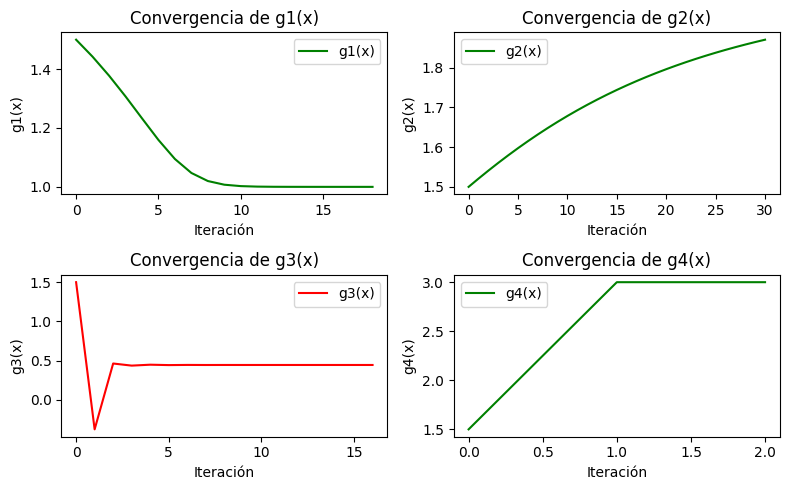

In [7]:
import matplotlib.pyplot as plt
# Creamos una figura para las gráficas

plt.figure(figsize=(8, 5))
# Gráfico para g1
plt.subplot(2, 2, 1)
plt.plot(resultados_g1,"g" ,label='g1(x)')
plt.title('Convergencia de g1(x)')
plt.xlabel('Iteración')
plt.ylabel('g1(x)')
plt.legend()

# Gráfico para g2
plt.subplot(2, 2, 2)
plt.plot(resultados_g2,"g", label='g2(x)')
plt.title('Convergencia de g2(x)')
plt.xlabel('Iteración')
plt.ylabel('g2(x)')
plt.legend()
# Gráfico para g3
plt.subplot(2, 2, 3)
plt.plot(resultados_g3,"r" ,label='g3(x)')
plt.title('Convergencia de g3(x)')
plt.xlabel('Iteración')
plt.ylabel('g3(x)')
plt.legend()
# Gráfico para g4
plt.subplot(2, 2, 4)
plt.plot(resultados_g4, "g",label='g4(x)')
plt.title('Convergencia de g4(x)')
plt.xlabel('Iteración')
plt.ylabel('g4(x)')
plt.legend()
# Mostrar las gráficas
plt.tight_layout()
plt.show()



Valor inicial para todas las funciones X = 1.5

## **Conclusiones**
* Podemos observar que la funcion $ g_1(x) = \sqrt[3]{6x^2 - 11x + 6} $. comienza a acercarse en la iteracion #10 a 1 y llega a una de las raices reales.
*   Tambien observamos que la funcion $ g_2(x) = \sqrt{\frac{x^3 + 11x - 6}{6}}$. va convergiendo a 2 (otra raiz real) pero muy lentamente se hicieron 30 iteraciones y apenas se esta acercando a la raiz real (2)
*   En la funcion $ g_3(x) = \frac{x^3 - 6x^2 + 6}{11} $. observamos que se mantiene constante a partir de la iteracion #3 sin embargo no llegamos a ninguna de las raices reales de la funcion original por eso es la que esta de color rojo.
*   Tambien observamos que en la iteracion #2 de la funcion $ g_4(x) = x - \frac{x^3 - 6x^2 + 11x - 6}{3x^2 - 12x + 11} $. obtenemos una de las raices exactas de la funcion original, converge mas rapido debido a que se obtuvo esta funcion a travez de transformar la funcion original en la forma de newton y es el mejor metodo de todos los anteriores.


 $ g_1(x) $ y $g_4(x) $ parecen ser las mejores funciones para el método del punto fijo en términos de convergencia a las raíces reales como se aprecia en la grafica, pero desde mi punto de vista $g_4(x)$ es la mejor ya que converge mas rapido en tan solo 2 iteraciones.




# 5. Resuelva un problema de aplicacion financiera-actuarial usando el **metodo** de Newton.

### **Problema:**

Supongamos que un individuo invierte una cantidad de dinero P en un banco que ofrece una tasa de interés anual compuesta r. El monto A que esta inversión se convertirá después de t años viene dado por:

$A = P(1+r)^t$

Ahora, digamos que un individuo invierte 1000 dolares y después de 5 años, encuentra que su inversión ha crecido a $1500. ¿Cuál es la tasa de interés anual compuesta que le ofreció el banco?

Usando la fórmula, podemos expresar esto como:

$1500=1000(1+r)^5$

Para encontrar r, podemos reformular el problema para que sea cero:
$f(r)=1000(1+r)^5−1500=0$
Usaremos el método de Newton para encontrar r. La derivada de f(r) respecto a r es:

$f'(r)= 5000(1+r)^4$

 **Método de Newton**


In [8]:
def f(r):
    return 1000*(1 + r)**5 - 1500

def df(r):
    return 5000*(1 + r)**4

def metodo_newton(f, df, r0, tol=1e-5, max_iter=1000):
    r = r0
    for _ in range(max_iter):
        r_new = r - f(r)/df(r)
        if abs(r_new - r) < tol:
            return r_new
        r = r_new
    return r
r_initial = 0.05  # Una suposición inicial de 5% de interés
interest_rate = metodo_newton(f, df, r_initial)
print(f"La tasa de interés anual compuesta aproximada es: {interest_rate * 100:.2f}%")

La tasa de interés anual compuesta aproximada es: 8.45%


Ahora graficaremos el crecimiento del capital para tener una nocion usando la tasa de 8.45%

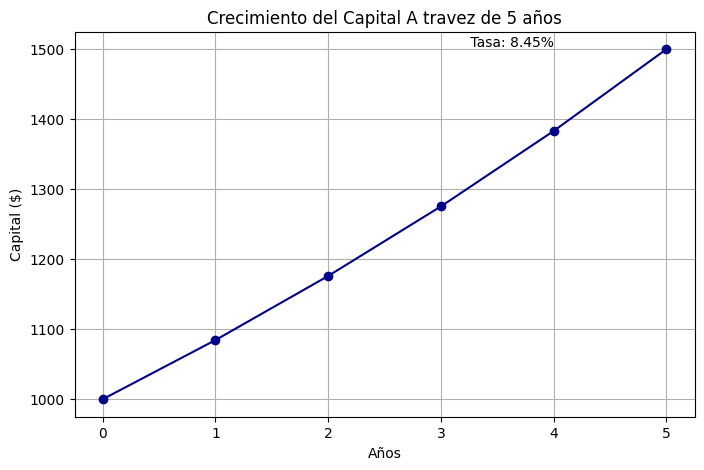

In [9]:
import matplotlib.pyplot as plt
# Calcular el capital a lo largo de los años

years = list(range(6))  # De 0 a 5 años
capital = [1000 * (1 + interest_rate)**n for n in years]

# Graficar
plt.figure(figsize=(8, 5))
plt.plot(years, capital,"darkblue" ,marker='o')
plt.title('Crecimiento del Capital A travez de 5 años')
plt.xlabel('Años')
plt.ylabel('Capital ($)')
plt.grid(True)
plt.xticks(years)  # Asegura que solo se muestran los años enteros en el eje x

# Mostrar la tasa de interés en el gráfico
plt.text(4, capital[5], f" Tasa: {interest_rate * 100:.2f}%", ha='right', va='bottom')
plt.show()




### **Conclusiones**

Usamos el metodo de newton para hallar la tasa de interes usada en el ejercicio de matematicas financiera es un metodo muy factible para hallar valores con una rapida convergencia y mejor precision que cualquier otro metodo


## 6. Muestra un problema donde el metodo de Newton diverja.

Un ejemplo de divergencia en el método de Newton se encuentra al intentar aproximar las raíces de la función:

$f(x)= x^3-2x+2$

Si intentamos encontrar una raíz cercana a x = 0 utilizando el método de Newton, podemos observar un comportamiento oscilatorio.

la derivada $f'(x)=3x^2-2$

In [10]:
def f(x):
    return x**3 - 2*x + 2

def df(x):
    return 3*x**2 - 2

def newton_method(f, df, x0, tol=1e-5, max_iter=10):
    x = x0
    results = [x]
    for _ in range(max_iter):
        x_new = x - f(x)/df(x)
        results.append(x_new)
        if abs(x_new - x) < tol:
            return results
        x = x_new
    return results

x_initial = 0
iterations = newton_method(f, df, x_initial)
print(iterations)


[0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0]


### **Conclusiones**
Al ejecutar este código, se observará que los valores oscilan sin acercarse a ninguna raíz, indicando que el método de Newton está divergiendo.

## 7. Acelere La convergencia de una sucesion usando el metodo de Aitken.

In [11]:
def metodo_aitken(sucesion):
    n = len(sucesion)
    if n < 3:
        return sucesion

    transformada = []
    for i in range(n-2):
        numerador = (sucesion[i+1] - sucesion[i])**2
        denominador = sucesion[i+2] - 2*sucesion[i+1] + sucesion[i]
        if denominador == 0:
            y = sucesion[i]
        else:
            y = sucesion[i] - numerador / denominador
        transformada.append(y)
    return transformada

Supongamos que queremos acelerar la convergencia de la sucesión dada por:
$$x_n = \frac{1}{n}$$


Esta sucesión converge a 0, pero lo hace bastante lentamente. Vamos a acelerar su convergencia usando la transformación de Aitken.

In [12]:
# Generar sucesión x_n = 1/n
n_values = list(range(1, 24))
sucesion = [1/n for n in n_values]

# Aplicar transformación de Aitken
acelerada = metodo_aitken(sucesion)
acelerada.append(0)
acelerada.append(0)
df = pd.DataFrame({"Sucesion original":sucesion , "Sucesion acelerada":acelerada})
df

,Sucesion original,Sucesion acelerada
0,1.000000,0.250000
1,0.500000,0.166667
2,0.333333,0.125000
3,0.250000,0.100000
4,0.200000,0.083333
5,0.166667,0.071429
6,0.142857,0.062500
7,0.125000,0.055556
8,0.111111,0.050000
9,0.100000,0.045455


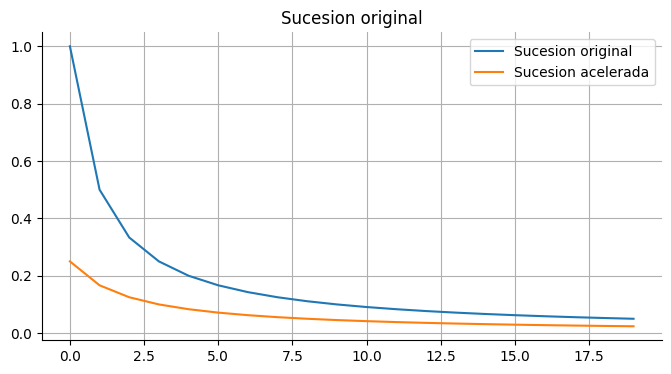

In [13]:
from matplotlib import pyplot as plt
df['Sucesion original'].head(20).plot(kind='line', figsize=(8, 4), title='Sucesion original')
df['Sucesion acelerada'].head(20).plot(kind='line')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.legend()
plt.grid()
plt.show()


### **Conclusiones**
La sucesión acelerada converge más rápidamente hacia 0 en comparación con la sucesión original. Es importante notar que el método de Aitken no garantiza una convergencia más rápida para todas las sucesiones, pero en muchos casos prácticos, puede mejorar significativamente la velocidad de convergencia.

## **8. Combina el metodo de Horner y el metodo de Newton para encontrar los ceros de un polinomio.**

### Método de Horner y Método de Newton para encontrar ceros de un polinomio

En el campo del análisis numérico, a menudo nos encontramos con el desafío de encontrar las raíces de un polinomio. Una forma eficiente de abordar este problema es combinar el método de Horner para la evaluación de polinomios con el método de Newton para encontrar raíces.

### Método de Horner para evaluar un polinomio y su derivada

El método de Horner es una técnica eficiente para evaluar un polinomio en un punto específico. Dado un polinomio  $P(x) = a_n x^n + a_{n-1} x^{n-1} + ... + a_1 x + a_0 $.

El cual nos permite representar este polinomio en la forma anidada:

$ P(x) = a_n + x (a_{n-1} + x (a_{n-2} + ... + x (a_1 + x a_0) ...))$

### Método de Newton para encontrar raíces

El método de Newton es una técnica iterativa utilizada para encontrar una aproximación a una raíz de una función. Se basa en la idea de aproximaciones lineales y se define mediante la fórmula:

$ x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)} $

Aquí,  $f(x_n)$  es el valor de la función en $ x_n $ y $ f'(x_n) $ es el valor de la derivada en $ x_n $.

### Combinando ambos métodos:

Para encontrar una raíz del polinomio usando el método de Newton, es esencial evaluar tanto el polinomio como su derivada en cada iteración. Usando el método de Horner, podemos hacer esto de manera eficiente y precisa. Al combinar estos métodos, no solo logramos una alta precisión en la búsqueda de raíces, sino también una implementación computacional eficiente.


### polinomio a usar para el ejemplo $x^3 - 5x^2 + 2x + 8 = 0$

Correspondiente al mismo polinomio del apartado #4

In [14]:
def metodo_horner(coeficientes, x):
    """Evalúa un polinomio y su derivada usando el método de Horner."""
    n = len(coeficientes) - 1
    p = coeficientes[0]
    dp = 0
    for i in range(1, n+1):
        dp = p + x * dp
        p = coeficientes[i] + x * p
    return p, dp

def metodo_newton(coeficientes, x0, tol=1e-6, iteraciones=100):
    """Usamos el método de Newton para encontrar una raíz del polinomio."""
    x = x0
    for j in range(iteraciones):
        p, dp = metodo_horner(coeficientes, x)
        if abs(p) < tol:
            return x
        x = x - p/dp
    raise ValueError("El método de Newton no convergió")

coeficientes = [1, -5, 2, 8]
valor_iniciales = [0, 1.5 , 3.5]
j = 1
for valores in valor_iniciales:
  root = metodo_newton(coeficientes, valores)
  print(f"Raíz {j} encontrada: {round(root,2)}")
  j += 1

Raíz 1 encontrada: -1.0
Raíz 2 encontrada: 2.0
Raíz 3 encontrada: 4.0


### **Conclusiones**

Utilice 3 valores iniciales diferentes realice las iteraciones correspondiente y cada valor inicial converge a una raiz real del polinomio original, la ventaja de usar horner con Newton es que converge mas rapido que cualquier otro. Tambien es importante saber que punto inicial seleccionar debe ser un valor cercano a la raiz real

## **9. Repite el ejercicio anterior escribiendo el polinomio de forma anidada (cree una funcion que haga este procedimiento para cualquier polinomio). Cuantas operaciones se usan para evaluar el polinomio escrito como en 8, y cuantas se usan escribiendolo en forma anidada.**

#### Polinomio original  $x^3 - 5x^2 + 2x + 8 = 0$
Puede ser reescrito en forma anidada utilizando el método de Horner de la siguiente forma:
1. Empezamos con $x^3$ y lo factorizamos como $(x^2-5x + 2)x +8$
2. Para el termino $(x^2-5x+2)x$ factorizamos otra vez quedando $((x-5)x+2)x$
3. Resultado final quedaria $((x-5)x +2)x +8$

Entonces el Polinomio de forma anidada queda de esta forma $((x-5)x +2)x +8$


In [15]:
#FUNCION QUE HACE EL PROCEDIMIENTO PARA CUALQUIER POLINOMIO
def forma_anidada_pol(coef, x):
    result = coef[0]
    for i in coef[1:]:
        result = result * x + i
    return result
# Coeficientes del polinomio ordenados del término de mayor grado al de menor grado.
coeffs = [1,-5, 2,8]  # se puede cambiar los valores de los coeficines para obtener la raiz de cualquier polinomio
x_value = 2
print(forma_anidada_pol(coeffs, x_value))

0


### **Conclusiones**
Para evaluar el polinomio $ x^3 - 5x^2 + 2x + 8 $ utilizando el método tradicional (escrito como en la pregunta 8) versus utilizando el método de Horner (forma anidada), podemos contar el número de operaciones aritméticas (multiplicaciones y sumas) que se realizan.

**1. Método Tradicional (Forma Estándar):**

Para evaluar $x^3$, necesitas 2 multiplicaciones $x \times x$ para $x^2$, y luego $x^2 \times x$ para $x^3$.

Por lo tanto, para la forma estándar:
- Multiplicaciones: 2 para $x^3$ + 1 para $-5x^2$ + 1 para $2x$ = 4 multiplicaciones
- Sumas: 3 sumas

Total de operaciones = 7 operaciones

**2. Método de Horner (Forma Anidada):**

Para evaluar usando Horner
- Multiplicaciones: 1 para $x \times (x - 5)$ + 1 para $(resultado) \times x$ + 1 para $(resultado) \times x$ = 3 multiplicaciones
- Sumas: 1 para sumar -5 + 1 para sumar 2 + 1 para sumar 8 = 3 sumas

Total de operaciones = 6 operaciones

**Para culminar:**

Utilizando el método de Horner, se reducen las operaciones para este polinomio específico:
- Forma estándar: 7 operaciones
- Forma anidada (Horner): 6 operaciones

La forma anidada es más eficiente en términos de operaciones aritméticas necesarias. La ventaja de la forma anidada aumenta con el grado del polinomio, especialmente en polinomios de grados altos en este ejemplo no se aprecia mucha diferencia por ser un Polinomio de Grado 3.


## **10. Escoge un metodo para resolver ecuaciones en dos variables y aplıquelo a un problema real**

Imaginemos que estamos trabajando en el diseño de una pieza mecánica que debe encajar en un sistema donde hay dos restricciones espaciales. Una restricción es que la pieza debe ajustarse a una determinada distancia del centro de un mecanismo circular (como una carcasa que debe tener un radio específico), y la otra restricción es que la pieza debe encajar en un perfil con una forma particular (por ejemplo, un soporte o una ranura con una forma cuadrática específica).

Aquí están las dos restricciones reformuladas como nuestro sistema de ecuaciones no lineales:
1. La primera funcion $f(x,y) = x^2 + y^2 - 4$ puede representar la restricción de que la pieza debe encajar dentro de una carcasa circular de radio 2.
  - La ecuacion $x^2 + y^2 = 4$ es la ecuación de un círculo de radio 2 centrado en el origen.
2. La segunda función $f(x,y) = x^2 - y - 1$ podría representar una restricción de que la pieza debe ajustarse a un perfil parabólico.
  - La parábola es  $y = x^2 - 1$ describe la forma del perfil visto de lado.

Resolver el sistema de ecuaciones usando el método de Newton-Raphson nos permitiría encontrar el punto o los puntos exactos donde ambas restricciones se satisfacen, lo que sería crucial para el diseño correcto de la pieza mecánica La solución al sistema de ecuaciones nos da las coordenadas (x, y) de los puntos donde la pieza se ajustaría perfectamente dentro de la carcasa circular y al mismo tiempo encajaría en el perfil parabólico. En la práctica, tal análisis es común en el diseño asistido por computadora (CAD) y la ingeniería mecánica, donde tales problemas se resuelven numéricamente para crear piezas que cumplan con múltiples especificaciones de diseño.

#### Primero debemos calcular las derivadas parciales de cada función con respecto a cada variable para construir el Jacobiano en cada iteración. Aquí están las derivadas parciales:
- Derivada parcial de \( f \) con respecto a \( x \):

  $$ \frac{\partial f}{\partial x} = 2x $$

- Derivada parcial de \( f \) con respecto a \( y \):

  $$ \frac{\partial f}{\partial y} = 2y $$

- Derivada parcial de \( g \) con respecto a \( x \):

  $$ \frac{\partial g}{\partial x} = 2x $$

- Derivada parcial de \( g \) con respecto a \( y \):

  $$ \frac{\partial g}{\partial y} = -1 $$


In [16]:
# Definición de las funciones
def f(x, y):
    return x**2 + y**2 - 4
def g(x, y):
    return x**2 - y - 1
# Derivadas parciales
def df_dx(x, y):
    return 2*x
def df_dy(x, y):
    return 2*y
def dg_dx(x, y):
    return 2*x
def dg_dy(x, y):
    return -1
# Método de Newton para dos variables
def newton_method_2var(f, g, df_dx, df_dy, dg_dx, dg_dy, x0, y0, tol=1e-6, max_iter=100):
    for iteration in range(max_iter):
        # Calculamos el valor de las funciones en el punto actual
        F = np.array([[f(x0, y0)], [g(x0, y0)]])
        # Calculamos el Jacobiano en el punto actual
        J = np.array([[df_dx(x0, y0), df_dy(x0, y0)],
                      [dg_dx(x0, y0), dg_dy(x0, y0)]])
        # Resolvemos el sistema lineal J * [dx, dy] = -F
        dx, dy = np.linalg.solve(J, -F).flatten()
        # Actualizamos el valor de x e y
        x0, y0 = x0 + dx, y0 + dy
        # Chequeamos la condición de tolerancia
        residual_norm = np.linalg.norm(F, 2)
        if residual_norm < tol:
            return x0, y0
    raise ValueError("No se encontró solución")
# Punto inicial
x0, y0 = 1,1
max_iter = 100
# Aplicamos el método
x_sol, y_sol = newton_method_2var(f, g, df_dx, df_dy, dg_dx, dg_dy, x0, y0)
print(f"La solución es x = {round(x_sol,1)}, y = {round(y_sol,1)}")

La solución es x = 1.5, y = 1.3


Solución: x = -1.51748991355198, y = 1.30277563773199
Solución: x = 1.51748991355198, y = 1.30277563773199


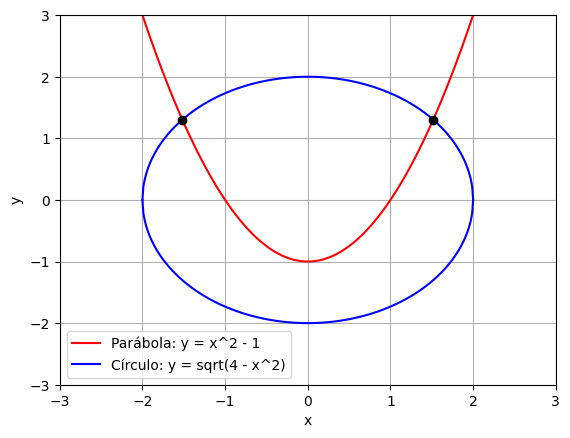

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve
x = np.linspace(-3, 3, 400)
y_parabola = x**2 - 1  # Ecuación de la parábola
# Grafica la parábola
plt.plot(x, y_parabola, label='Parábola: y = x^2 - 1', color='red')
x_circle = np.linspace(-2, 2, 400)
y_circle_pos = np.sqrt(4 - x_circle**2)  # Parte positiva de la raíz cuadrada para el círculo
y_circle_neg = -np.sqrt(4 - x_circle**2) # Parte negativa de la raíz cuadrada para el círculo
# Grafica el círculo
plt.plot(x_circle, y_circle_pos, label='Círculo: y = sqrt(4 - x^2)', color='blue')
plt.plot(x_circle, y_circle_neg, color='blue')
# Ajusta los límites del gráfico
plt.xlim([-3, 3])
plt.ylim([-3, 3])
# Agregamos una leyenda
plt.legend()
# Agrega una cuadrícula
plt.grid(True)
# Agrega etiquetas a los ejes
plt.xlabel('x')
plt.ylabel('y')
# Encuentra las intersecciones utilizando sympy
x_sym, y_sym = symbols('x y', real=True)
circle_eq = Eq(x_sym**2 + y_sym**2, 4)
parabola_eq = Eq(y_sym, x_sym**2 - 1)
# Resuelve el sistema de ecuaciones
solutions = solve((circle_eq, parabola_eq), (x_sym, y_sym), dict=True)
# Filtra y grafica solo las soluciones reales
for sol in solutions:
    x_val = sol[x_sym]
    y_val = sol[y_sym]
    # Verifica si la solución es real
    if x_val.is_real and y_val.is_real:
        print(f"Solución: x = {x_val.evalf()}, y = {y_val.evalf()}")
        # Marca las soluciones en el gráfico
        plt.plot(x_val.evalf(), y_val.evalf(), 'ko')  # 'ko' para puntos negros
    else:
        print(f"Solución compleja descartada: x = {x_val.evalf()}, y = {y_val.evalf()}")
# Muestra el gráfico
plt.show()


## **Conclusiones**

las dimensiones obtenidas de (1.5, 1.3) implican que la pieza diseñada se ajustará bastante cerca de la carcasa circular y el perfil parabólico que especificaste. En un entorno de diseño asistido por computadora (CAD), estos valores se podrían utilizar para crear un modelo 3D de la pieza, que luego se verificaría con simulaciones o se ajustaría con más iteraciones si es necesario.